## Лабораторная работа № 8. Классификация изображений.
### (Валяев Георгий, ПИ20-6)

In [146]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Задания для выполнения

##### 1. Загрузите датасет Olivetti faces;
##### 2. Познакомьтесь с описанием и структурой датасета. Описание можно найти в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html?highlight=datasets).

In [88]:
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

Load the Olivetti faces data-set from AT&T (classification).

Download it if necessary.

================= =====================
Classes         40
Samples total       400
Dimensionality      4096
Features        real, between 0 and 1
================= =====================

Read more in the :ref:`User Guide <olivetti_faces_dataset>`.

Parameters
----------
data_home : str, default=None
    Specify another download and cache folder for the datasets. By default
    all scikit-learn data is stored in '~/scikit_learn_data' subfolders.

shuffle : bool, default=False
    If True the order of the dataset is shuffled to avoid having
    images of the same person grouped.

random_state : int, RandomState instance or None, default=0
    Determines random number generation for dataset shuffling. Pass an int
    for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

download_if_missing : bool, default=True
    If False, raise a IOError if the data is not locally available
    instead of trying to download the data from the source site.

return_X_y : bool, default=False
    If True, returns `(data, target)` instead of a `Bunch` object. See
    below for more information about the `data` and `target` object.

    .. versionadded:: 0.22

Returns
-------

data : :class:`~sklearn.utils.Bunch`
    Dictionary-like object, with the following attributes.

data: ndarray, shape (400, 4096)
    Each row corresponds to a ravelled face image of original size 64 x 64 pixels.

images : ndarray, shape (400, 64, 64)
    Each row is a face image corresponding to one of the 40 subjects of the dataset.

target : ndarray, shape (400,)
    Labels associated to each face image.
    Those labels are ranging from 0-39 and correspond to the Subject IDs.

DESCR : str
    Description of the modified Olivetti Faces Dataset.

(data, target) : tuple if `return_X_y=True`
    Tuple with the `data` and `target` objects described above.

    .. versionadded:: 0.22 """

In [89]:
dataframe = pd.DataFrame(faces.data)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [90]:
faces.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [91]:
target = faces.target
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

##### 3. Выведите информацию о количественных параметрах датасета;
* Количество точек данных (измерений) в наборе
* Количество полей данных (атрибутов)
* Количество отсутствующих значений для каждого поля

In [92]:
print(f"Количество точек данных в наборе: {len(dataframe.shape)}")
print(f"Количество полей данных (атрибутов): \n1) {dataframe.shape[0]}\n2) {dataframe.shape[1]}")

Количество точек данных в наборе: 2
Количество полей данных (атрибутов): 
1) 400
2) 4096


In [93]:
print("Количество отсутствующих значений для каждого поля:")
dataframe.isna().sum()

Количество отсутствующих значений для каждого поля:


0       0
1       0
2       0
3       0
4       0
       ..
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64

##### 4. Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

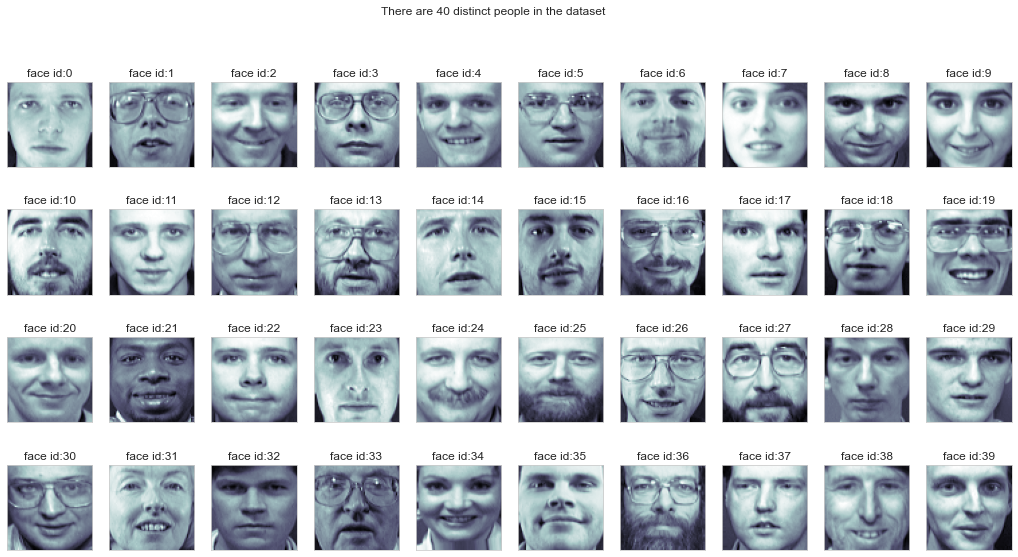

In [94]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = ax.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap=plt.cm.bone)
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(faces.images, np.unique(target))

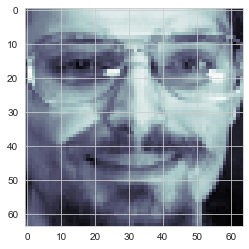

In [119]:
plt.imshow(faces.images[160], cmap=plt.cm.bone)
plt.show()

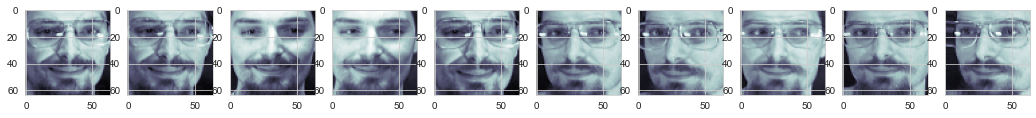

In [120]:
items_count = 10
fig, axes = plt.subplots(1, items_count, figsize=(18, 9))
for i in range(items_count):
    axes[i].imshow(faces.images[i + 160], cmap=plt.cm.bone)
plt.show()

##### 5. Разделите эти данные на тестовую и обучающую выборки;

In [139]:
X, Y = faces.data, faces.target
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=True)
print("X_train shape:", X_train.shape)
print("y_train shape: {}".format(y_train.shape))

X_train shape: (320, 4096)
y_train shape: (320,)


В данном случае мы используем удобную встроенную функцию sklearn для разбиения выборки. Мы используем соотношение 80/20 для обучающей и тестовой выборки. Соотношение может колебаться и зависит от множества факторов, но 80/20 - хорошее значение по умолчанию.

##### 6. Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [140]:
clf = SVC()
clf.fit(X, Y)
y_pred = clf.predict(X_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)
accuracy

1.0

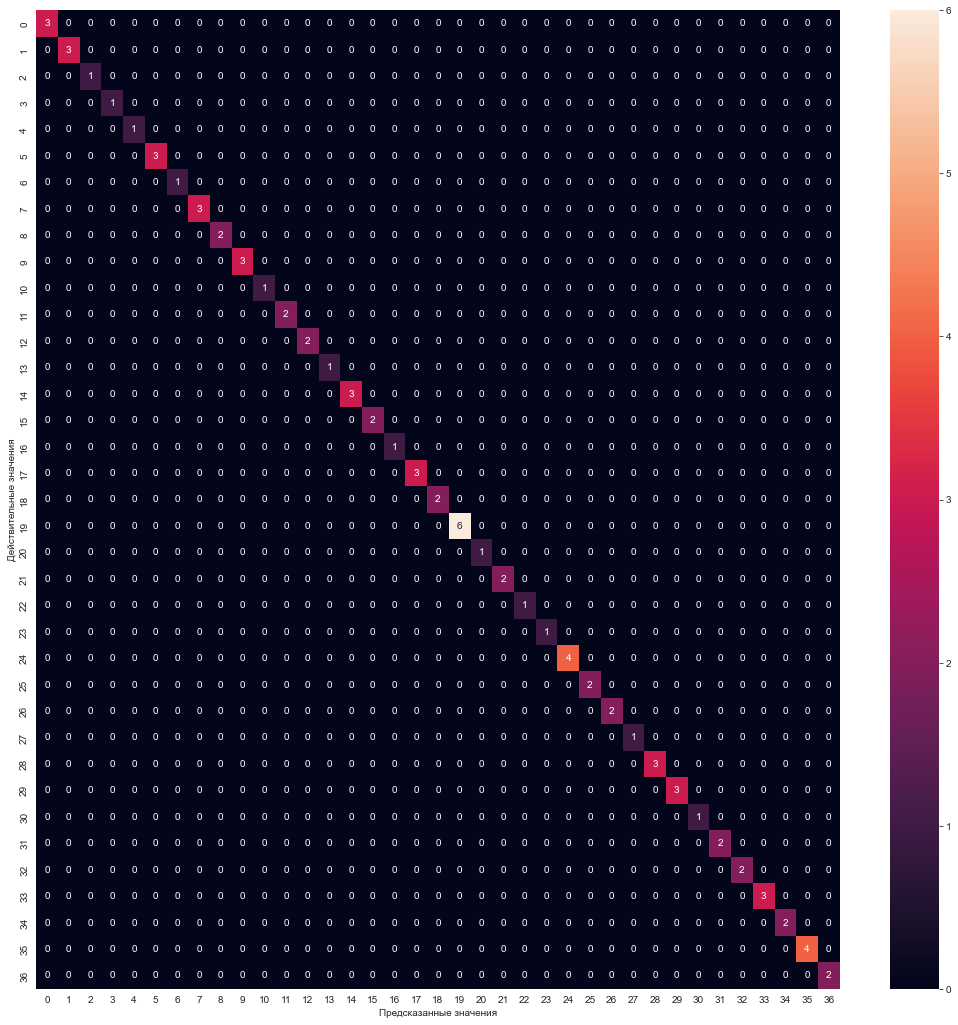

In [132]:
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(18, 18))
ticks = np.arange(len(class_names))

plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel("Действительные значения")
plt.xlabel("Предсказанные значения")
plt.show()

##### 7. Оцените качество модели на тестовой выборке с помощью следующих метрик:
#####    достоверность предсказания (accuracy);
#####    точность (precision);
#####    полнота (recall);

In [141]:
models = [("LR",LogisticRegression()), ("NB",GaussianNB()),
          ("KNN",KNeighborsClassifier(n_neighbors=5)), ("SVM",SVC())]

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score: {:0.5f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== LR RESULT ==========
Accuracy score: 0.96250

========== NB RESULT ==========
Accuracy score: 0.86250

========== KNN RESULT ==========
Accuracy score: 0.81250

========== SVM RESULT ==========
Accuracy score: 0.83750



In [142]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
   

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [143]:
precision = round(metrics.precision_score(y_test, y_pred, average='macro'), 3)
recall = metrics.recall_score(y_test, y_pred, average='macro')
precision, recall

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.797, 0.8183760683760684)

##### 8. Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

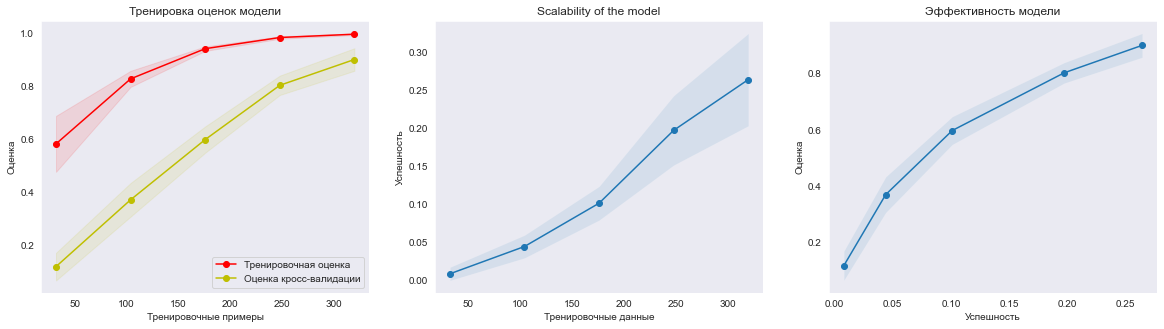

In [152]:
def plot_learning_curve(estimator, title, X, Y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)

    axes[0].set_xlabel("Тренировочные примеры")
    axes[0].set_ylabel("Оценка")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, Y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="y")
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Тренировочная оценка")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="y", label="Оценка кросс-валидации")
    axes[0].set_title("Тренировка оценок модели")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1,)
    axes[1].set_xlabel("Тренировочные данные")
    axes[1].set_ylabel("Успешность")
    axes[1].set_title("Scalability of the model")

    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]

    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted, test_scores_mean_sorted - test_scores_std_sorted,
                         test_scores_mean_sorted + test_scores_std_sorted, alpha=0.1,)
    axes[2].set_xlabel("Успешность")
    axes[2].set_ylabel("Оценка")
    axes[2].set_title("Эффективность модели")

    return plt.show()

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(clf, "", X, Y, cv=cv)

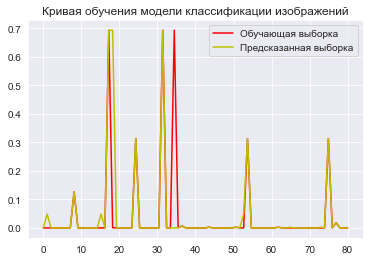

In [151]:
# Функция ошибки логистической регрессии => - log (1 / (1 + exp(-z)))
def main_f(y_input):
    y = []
    for element in y_input:
        y_elem = (-1) * math.log(1 / (1 + math.exp(-element)), math.e)
        y.append(y_elem)
    return np.array(y)

x_par = np.linspace(0, y_test.shape[0], y_test.shape[0])
y_par_1 = main_f(y_test)
y_par_2 = main_f(y_pred)
plt.figure()
plt.title("Кривая обучения модели классификации изображений", fontsize=12)
plt.plot(x_par, y_par_1, "r", label="Обучающая выборка")
plt.plot(x_par, y_par_2, "y", label="Предсказанная выборка")
plt.legend(loc="best")
plt.show()

##### 9. Сделайте вывод о применимости модели.

In [144]:
print('Средний итог для вывода : ' + str(round(sum([accuracy, precision, recall]) / 3, 4)))

Средний итог для вывода : 0.8718


###### Подводя итог реализации и обучения модели логистической регрессии, можно сделать вывод, что данная модель в среднем на 87% будет полезна при применении на других выборках данных.

###### Модель можно применить, но стоит увеличить объем данных, например, за счет аугментации на основе методов с библиотеки OpenCV (наклон под углом, произвольное изменение пикселей, зеркалирование по вертикали/горизонтали) т.к. 400 очень мало, даже с учетом кросс-валидации